In [36]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols

plt.rc('font',family='Malgun Gothic')
plt.rcParams['axes.unicode_minus']=False

In [37]:
#주피터 노트북 여러 줄 출력
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [38]:
#데이터 읽어오기
df=pd.read_csv('PV_Weather_Inchon_2020.csv',encoding='cp949')

In [39]:
# 일시를 datetime형으로 변환
df.index = pd.to_datetime(df['Datetime'])
# 기존 컬럼 삭제
df = df.drop(['Datetime'], axis=1)
df

,Tem,Irr,PV
Datetime,,,
2020-01-01 00:00:00,-5.4,0.0,0.0
2020-01-01 01:00:00,-5.2,0.0,0.0
2020-01-01 02:00:00,-5.3,0.0,0.0
2020-01-01 03:00:00,-5.4,0.0,0.0
2020-01-01 04:00:00,-5.3,0.0,0.0
...,...,...,...
2020-12-31 19:00:00,-6.9,0.0,0.0
2020-12-31 20:00:00,-7.2,0.0,0.0
2020-12-31 21:00:00,-6.8,0.0,0.0


In [40]:
#년 월 데이터로 만들기
pr_m=pd.period_range(start = '2020-01',end= None, periods= 12, freq= 'M' )
pr_m

PeriodIndex(['2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06',
             '2020-07', '2020-08', '2020-09', '2020-10', '2020-11', '2020-12'],
            dtype='period[M]')

In [41]:
#상관 계수
for m in range(12):
    df.loc[str(pr_m[m])].corr()

,Tem,Irr,PV
Tem,1.000000,0.257937,0.250285
Irr,0.257937,1.000000,0.963959
PV,0.250285,0.963959,1.000000


,Tem,Irr,PV
Tem,1.000000,0.224494,0.196298
Irr,0.224494,1.000000,0.974955
PV,0.196298,0.974955,1.000000


,Tem,Irr,PV
Tem,1.000000,0.415224,0.367959
Irr,0.415224,1.000000,0.985352
PV,0.367959,0.985352,1.000000


,Tem,Irr,PV
Tem,1.000000,0.550802,0.508861
Irr,0.550802,1.000000,0.986484
PV,0.508861,0.986484,1.000000


,Tem,Irr,PV
Tem,1.000000,0.580911,0.551714
Irr,0.580911,1.000000,0.981594
PV,0.551714,0.981594,1.000000


,Tem,Irr,PV
Tem,1.000000,0.634618,0.627433
Irr,0.634618,1.000000,0.982591
PV,0.627433,0.982591,1.000000


,Tem,Irr,PV
Tem,1.000000,0.594361,0.577818
Irr,0.594361,1.000000,0.982378
PV,0.577818,0.982378,1.000000


,Tem,Irr,PV
Tem,1.000000,0.631282,0.612159
Irr,0.631282,1.000000,0.962778
PV,0.612159,0.962778,1.000000


,Tem,Irr,PV
Tem,1.000000,0.533462,0.510707
Irr,0.533462,1.000000,0.966293
PV,0.510707,0.966293,1.000000


,Tem,Irr,PV
Tem,1.000000,0.409772,0.391104
Irr,0.409772,1.000000,0.993244
PV,0.391104,0.993244,1.000000


,Tem,Irr,PV
Tem,1.000000,0.148639,0.126252
Irr,0.148639,1.000000,0.990970
PV,0.126252,0.990970,1.000000


,Tem,Irr,PV
Tem,1.000000,0.131787,0.107194
Irr,0.131787,1.000000,0.965244
PV,0.107194,0.965244,1.000000


<Figure size 288x1008 with 0 Axes>

Text(0.5, 1.0, '20201월')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0, flags=flags)


Text(0.5, 1.0, '20202월')

Text(0.5, 1.0, '20203월')

Text(0.5, 1.0, '20204월')

Text(0.5, 1.0, '20205월')

Text(0.5, 1.0, '20206월')

Text(0.5, 1.0, '20207월')

Text(0.5, 1.0, '20208월')

Text(0.5, 1.0, '20209월')

Text(0.5, 1.0, '202010월')

Text(0.5, 1.0, '202011월')

Text(0.5, 1.0, '202012월')

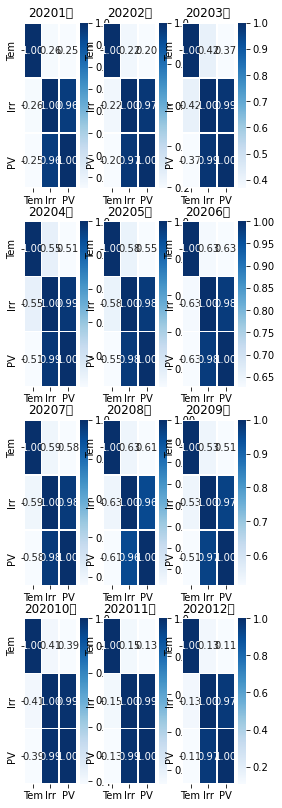

In [42]:
#연간 시간대별 상관계수 시각화
plt.figure(figsize=(4,14))
for m in range(12):
    plt.subplot(4,3,m+1)
    sns.heatmap(data=df.loc[str(pr_m[m])].corr(),
               annot=True, #각 셀에 숫자를 입력
                fmt= '.2f', # 숫자 형태
               linewidths=.5,
               cmap= 'Blues')
    plt.title('2020'+str(m+1)+'월')

In [43]:
#연간 시간대별 상관계수 시각화
corr_PV_Tem_Irr = np.zeros((2,12)) #2행 12열
for m in range(12):
    corr_PV_Tem_Irr[0,m] = df.loc[str(pr_m[m])].corr().values[2,0]
    corr_PV_Tem_Irr[1,m] = df.loc[str(pr_m[m])].corr().values[2,1]

<Figure size 1008x288 with 0 Axes>

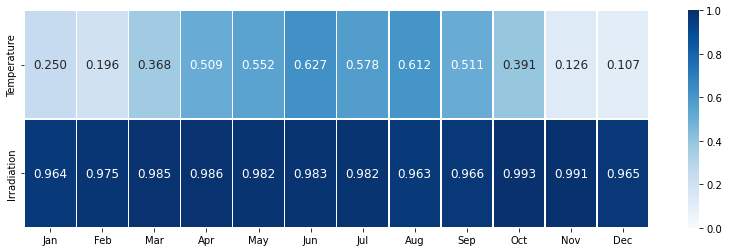

In [44]:
mon_legend = ['Jan','Feb','Mar','Apr','May','Jun',
              'Jul','Aug','Sep','Oct','Nov','Dec']

plt.figure(figsize=(14,4))
sns.heatmap(data=corr_PV_Tem_Irr,
            annot=True, #각 셀에 숫자를 입력
            fmt= '.3f', # 숫자 형태
            linewidths=.5,
            cmap= 'Blues',
           xticklabels=mon_legend, 
           yticklabels=['Temperature','Irradiation'],
           annot_kws={"size":12},
           vmin=0, vmax=1)
plt.show()

In [45]:
#계수 구하기: [계수,절편]
poly1 = np.polyfit(df.loc['2020-10']['Irr'],
                   df.loc['2020-10']['PV'],1)
f1=np.poly1d(poly1)
print(poly1)
print(f1)
f1[0],f1[1]

[51.07996335 -0.80699223]
 
51.08 x - 0.807


(-0.8069922250547538, 51.07996334859782)

<Figure size 432x288 with 0 Axes>

Text(0.5, 0, '일사량')

Text(0, 0.5, 'PV발전량')

Text(0.5, 100, 'y=51.1*일사량-0.8')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_text

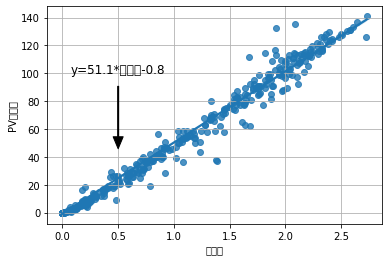

In [46]:
#시각화
x= np.linspace(0,3,100)

plt.figure()
sns.regplot(data=df.loc['2020-10'],x='Irr',y='PV')
plt.xlabel('일사량')
plt.ylabel('PV발전량')
plt.grid()
plt.annotate('y='+'{0:0.1f}'.format(f1[1])+'*일사량'+'{0:0.1f}'.format(f1[0]),
             xy=(0.5,40), xytext=(0.5,100),
             fontsize=12, ha='center',
             arrowprops=dict(facecolor='black', width=1,shrink=0.1,headwidth=10))

In [47]:
#예측 추정
predict = f1(df.loc['2020-10']['Irr'])
predict[:24]

array([ -0.80699223,  -0.80699223,  -0.80699223,  -0.80699223,
        -0.80699223,  -0.80699223,  -0.80699223,  -0.29619259,
         5.83340301,  24.73298945,  51.29457039,  62.02136269,
        82.96414767,  85.0073462 ,  92.15854107, 100.33133521,
        77.3453517 ,  45.16497479,  14.51699678,  -0.80699223,
        -0.80699223,  -0.80699223,  -0.80699223,  -0.80699223])

In [48]:
#dateFrame으로 변환
df_10m =df.loc['2020-10']
df_10m['Predict']= predict
df_10m

,Tem,Irr,PV,Predict
Datetime,,,,
2020-10-01 00:00:00,18.0,0.0,0.0,-0.806992
2020-10-01 01:00:00,17.8,0.0,0.0,-0.806992
2020-10-01 02:00:00,18.0,0.0,0.0,-0.806992
2020-10-01 03:00:00,17.5,0.0,0.0,-0.806992
2020-10-01 04:00:00,17.4,0.0,0.0,-0.806992
...,...,...,...,...
2020-10-31 19:00:00,15.2,0.0,0.0,-0.806992
2020-10-31 20:00:00,15.2,0.0,0.0,-0.806992
2020-10-31 21:00:00,15.2,0.0,0.0,-0.806992


<Figure size 1008x288 with 0 Axes>

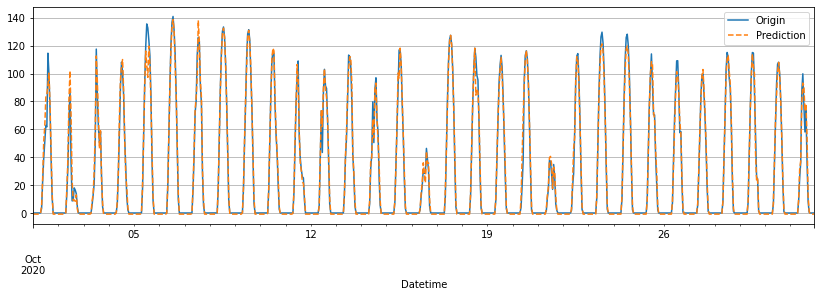

In [49]:
#예측 결과 시각화
plt.figure(figsize=(14,4))
df_10m['PV'].plot(label = 'Origin')
df_10m['Predict'].plot(label='Prediction',linestyle='--')
plt.legend()
plt.grid()

<Figure size 1008x288 with 0 Axes>

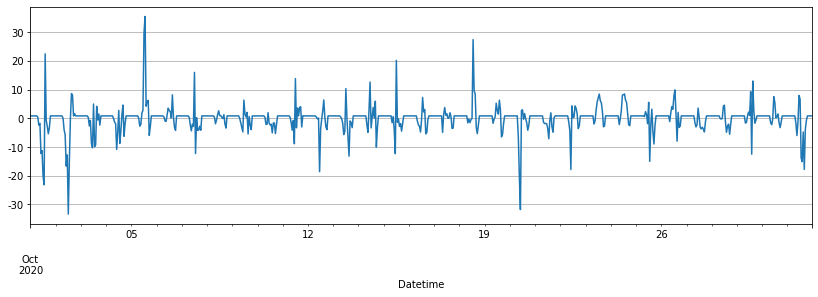

In [50]:
#예측 오차
plt.figure(figsize=(14,4))
df_10m['Err'] =df_10m['PV']-df_10m['Predict']
df_10m['Err'].plot()
plt.grid()

In [51]:
#성능평가
MSE = ((df_10m['PV']-df_10m['Predict'])**2).mean()
RMSE = np.sqrt(MSE)
print('MSE:'+'{:.2f}'.format(MSE))
print("RMSE"+'{:.2f}'.format(RMSE))

MSE:22.05
RMSE4.70


In [53]:
#ols (최소자승법)
fit2 =ols('PV ~ Irr + Tem',data=df.loc['2020-10']).fit()
fit2.summary() #요약

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PV   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                 2.778e+04
Date:                Thu, 03 Feb 2022   Prob (F-statistic):               0.00
Time:                        08:30:25   Log-Likelihood:                -2198.0
No. Observations:                 744   AIC:                             4402.
Df Residuals:                     741   BIC:                             4416.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2916      0.778      2.947      0.003       0.765       3.818
Irr           51.4826      0.238    216.660      0.000      51.016      51.949
Tem           -0.2248      0.054     -4.135      0.000      -0.331      -0.118
==============================================================================
Omnibus:                      197.038   Durbin-Watson:                   1.401
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9831.463
Skew:                          -0.254   Prob(JB):                         0.00
Kurtosis:                      20.801   Cond. No.                         69.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
#회귀 계수
fit2.params

#예측 값
fit2.predict(exog=dict(Irr=[10],Tem=[5]))


Intercept     2.291577
Irr          51.482625
Tem          -0.224754
dtype: float64

0    515.99406
dtype: float64

In [ ]:
'